In [127]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

----
## Parâmetros

In [128]:
# Dimensões (m)
c = 0.23                # livro (comprimento)
l = 0.16                # livro (largura)
h = 0.02                # livro (altura)

# Áreas (m²)
As = l*h                 # livro (area de contato contra o ar)

# Volumes (m³)
va = l*h*c               # livro

# Densidades (kg/m³)
rhoa = 997               # livro

# Massas (kg)
ma = rhoa*va             # livro

g = 9.81
angle_i = 14

----
## 1° Iteração

In [129]:
# 
def modelo1 (X, t, angle):
    
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    dxdt = vx
    dydt = vy
    dvxdt = g*cos(radians(angle)) - g*tan(radians(angle))*sin(radians(angle))
    dvydt = -g*sin(radians(angle)) + g*tan(radians(angle))*sin(radians(angle))
    
    if angle < angle_i:
        return [0, 0, 0, 0]
    elif y < 0:
        return [dxdt, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]

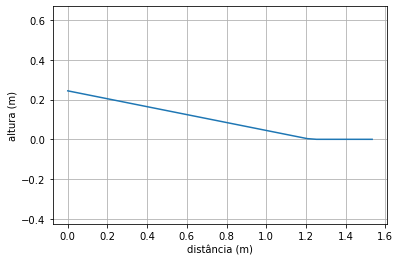

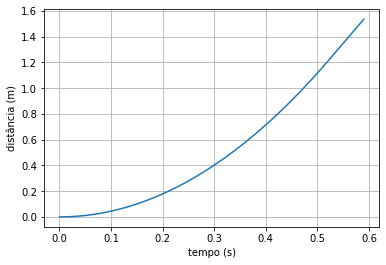

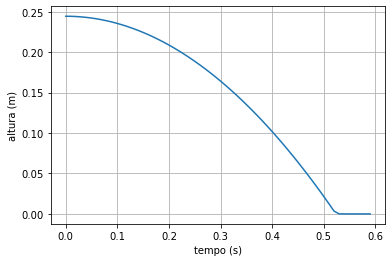

In [130]:
t_lista = np.arange(0, 0.6, 0.01)

# Condições iniciais
angle = 14
x0 = [0, 1.01*sin(radians(angle)), 0, 0]

# Resolução numérica
x = odeint(modelo1, x0, t_lista, args = (angle,))
listx = x[:,0]
listy = x[:,1]

# Variável que guarda gráfico
# modelo1, ax = plt.subplots()

# Plota gráfico somente para apresentação
plt.plot(listx, listy)
plt.axis('equal')
plt.title('')
plt.xlabel('distância (m)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
# modelo1.savefig('0.modelo1.png',  format = 'png', dpi = 1200)

plt.plot(t_lista, listx)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('distância (m)')
plt.grid(True)
plt.show()

plt.plot(t_lista, listy)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()